Name: Chanyu Choung

Class: CMP414

Homework due date: May 10th, 2021 (Monday)

# Homework: FashionMNIST

For this homework assignment, you are asked to build a neural network classifier on the FasionMNIST dataset. The FashionMNIST dataset has a lot in common with the MNIST dataset:
- The dataset contains 70,000 grayscale images, split into training set (60,000 images) and test set (10,000 images).
- The resolution of images is 28 by 28 pixels.
- There are a total of 10 target labels.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Version: ", tf.__version__)

Version:  2.4.1


In [ ]:
# Import the dataset
fashion_mnist = K.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Here are the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes without activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


Shape of the image: (28, 28)


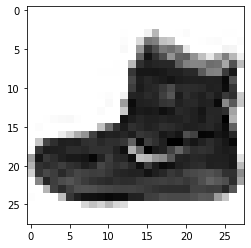

In [ ]:
idx = 0
img = train_images[idx, :, :]
print("Shape of the image:", img.shape)
plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
model = K.models.Sequential([
    K.layers.Flatten(input_shape=(28, 28)),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dense(10)                                   
])

In [ ]:
index = 0
predictions = model(train_images[index:(index+1)]).numpy()
print(predictions)

[[ 0.33017     0.09013558  1.0581692  -0.20862415  0.45227444 -1.1781316
   0.25636882  0.17390569 -0.96072364 -0.49461243]]


In [ ]:
loss_fn = K.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(train_labels[index:(index+1)], predictions).numpy()

2.9397948

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6232 - accuracy: 0.7818
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3113 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.8994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2554 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2441 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8794


[0.33697283267974854, 0.8794000148773193]

In [ ]:
test_labels_pred = []
raw_predictions = model(test_images).numpy()
for row_idx in range(raw_predictions.shape[0]):
    logits = raw_predictions[row_idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    test_labels_pred.append(class_pred)
print(test_labels_pred)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 6, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0, 6, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 6, 1, 3, 5, 6, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 2, 2, 4, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 4, 0, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 6, 6, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 6, 

In [ ]:
mat = confusion_matrix(test_labels, test_labels_pred)
print(mat)

[[851   1   9  13   2   1 114   0   9   0]
 [  5 969   1  18   2   0   5   0   0   0]
 [ 10   1 774  10  81   0 121   0   3   0]
 [ 28   4   8 873  40   0  41   0   6   0]
 [  1   0 113  23 784   0  76   0   3   0]
 [  0   0   0   1   0 963   0  22   1  13]
 [135   0  72  20  61   0 705   0   7   0]
 [  0   0   0   0   0  22   0 966   0  12]
 [  2   0   0   3   2   3   9   3 978   0]
 [  0   0   0   0   0  10   1  58   0 931]]


There's a lot of mistakes being made with Shirt category, the mistake primarily consist of labelling shirt as either T-Shirt, Pullover, Coat categories.